In [2]:
from matplotlib import pyplot as plt
import requests
import cv2
import time
import re
import numpy
import urllib.request


In [3]:
base = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0'
recog_url = f'{base}/recognizeText?mode=Printed'
key = '6023f2c1af9e45fd82ed220de33ba475'
headers = {'Ocp-Apim-Subscription-Key': key}                           
headers_stream = {'Ocp-Apim-Subscription-Key': key,                    
                  'Content-Type': 'application/octet-stream'}  

In [28]:
def get_license(img):
    img_encode = cv2.imencode('.jpg', img)[1]       
    img_bytes = img_encode.tobytes()               
    r1 = requests.post(recog_url,            
                              headers = headers_stream, 
                              data = img_bytes)
    if r1.status_code != 202:                
        print(r1.json())
        return 'Error'
    
    result_url = r1.headers['Operation-Location']
    r2 = requests.get(result_url, headers = headers) 
    while r2.status_code == 200 and r2.json()['status'] != 'Succeeded':
        r2 = requests.get(result_url, headers = headers)    
        time.sleep(0.5)
        print('status: ', r2.json()['status'])     
    
    carcard = ''  
    lines = r2.json()['recognitionResult']['lines']
    for i in range(len(lines)):
        text = lines[i]['text'] # 取得辨識文字
        m = re.match(r'^[\w]{2,4}[-. ][\w]{2,4}$', text)    
        if m != None:   
            carcard = m.group()
            return carcard
    if carcard == '':   
        return "Sorry,Not Found"


Please input the car Pattle Link: http://www.ytauto168.com/Uploadimages/product/201231315057934.JPG


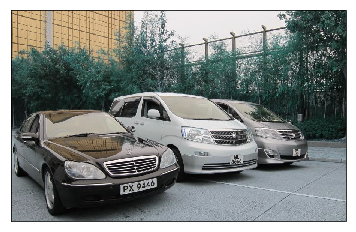

status:  Start
status:  Succeeded
License Plate Number： PX 9446
status:  Finish


In [31]:
def url_to_image(url):
    respone = urllib.request.urlopen(url)
    image = numpy.asarray(bytearray(respone.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image
try:    
    url = input("Please input the car Pattle Link: ")
    img = url_to_image(url)
    
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  
    plt.show()
    print('status:  Start')
    text = get_license(img)      
    print('License Plate Number：', text)
    cv2.waitKey(0)              
    cv2.destroyAllWindows()    
    print('status:  Finish')
except:
    print('Read Picture Error')

